In [12]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [13]:
cv_dir = 'cv_new'
eggholder_dir = 'reg'

In [14]:

files_cifar10 = ['SGD_Moment_torch.csv', 'SGD_torch.csv', 'AdaHess_torch.csv', 'Adam_torch.csv', 'AdamW_torch.csv']
files_eggholder = ['SGD_Moment_Reg_torch.csv', 'SGD_Reg_torch.csv', 'Adam_Reg_torch.csv', 'AdamW_Reg_torch.csv', 'AdamHess_Reg_torch.csv']
print(len(files_cifar10))
print(len(files_eggholder))

5
5


### Classification Task


======== Classification Experiment on Cifar-10 dataset ========
AdaHess_torch_CIFAR10_new.csv


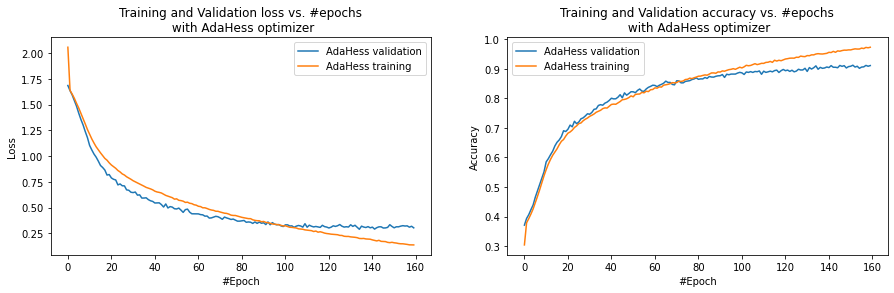

SGD_Moment_torch_CIFAR10_new.csv


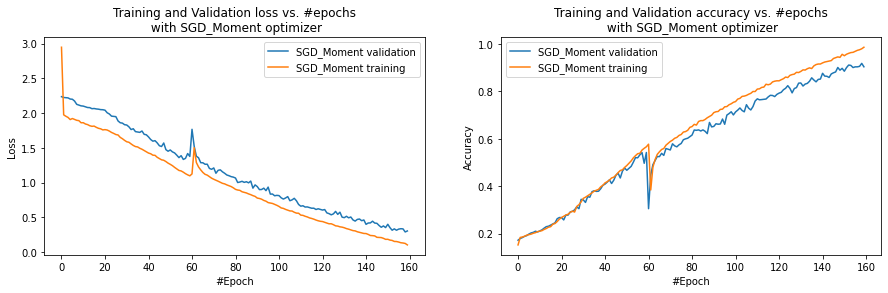

AdamW_torch_CIFAR10_new.csv


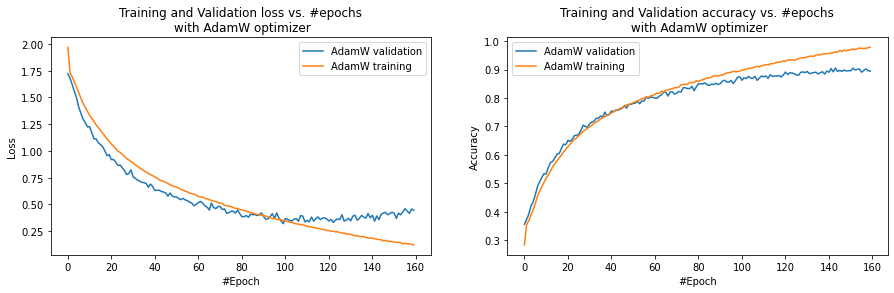

Adam_torch_CIFAR10_new.csv


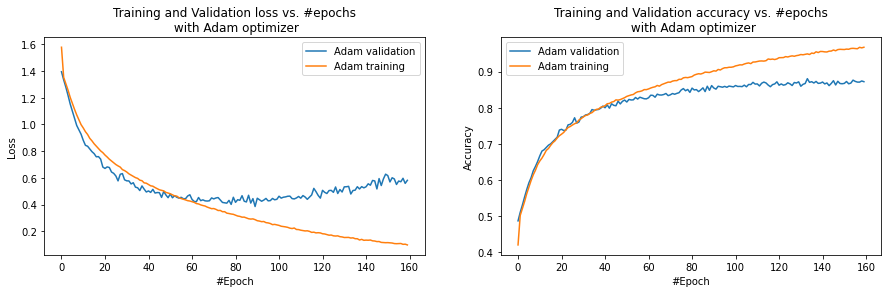

SGD_torch_CIFAR10_new.csv


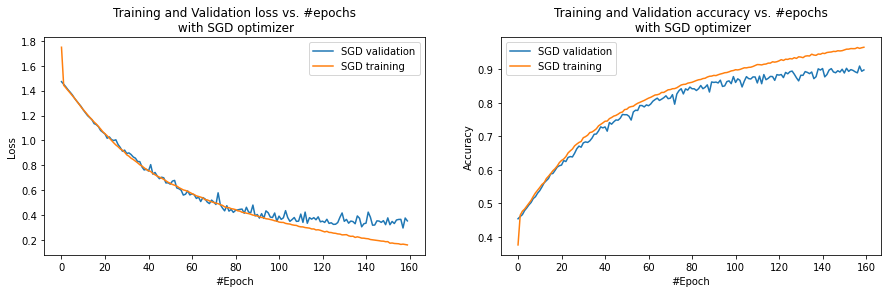

In [15]:
print("======== Classification Experiment on Cifar-10 dataset ========")
for filename in os.listdir(cv_dir):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(cv_dir, filename))
        print(filename)
        opt = filename.split('.')[0].rsplit('_',3)[0]
        fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 4))
        ax1.plot(df['epoch'], df['val_loss'], label=opt + " validation")
        ax1.plot(df['epoch'], df['loss'], label=opt + " training")
        # plt.plot(df2['epoch'], df2['val_loss'], label="SGD_Reg")
        ax1.set(xlabel="#Epoch", ylabel="Loss")
        ax1.legend(loc="best")
        ax1.title.set_text("Training and Validation loss vs. #epochs\n with {} optimizer".format(opt))
        
        ax2.plot(df['epoch'], df['val_acc'], label=opt + " validation")
        ax2.plot(df['epoch'], df['accuracy'], label=opt + " training")
        # plt.plot(df2['epoch'], df2['val_loss'], label="SGD_Reg")
        ax2.set(xlabel="#Epoch", ylabel="Accuracy")
        ax2.legend(loc="best")
        ax2.title.set_text("Training and Validation accuracy vs. #epochs\n with {} optimizer".format(opt))
        plt.show()

======== Classification Experiment on Cifar-10 dataset ========
AdaHess_torch_CIFAR10_new.csv
max accuracy 0.9122
min loss 0.289417948682094
SGD_Moment_torch_CIFAR10_new.csv
max accuracy 0.9178
min loss 0.28887460674895
AdamW_torch_CIFAR10_new.csv
max accuracy 0.9053
min loss 0.319794871396617
Adam_torch_CIFAR10_new.csv
max accuracy 0.8804
min loss 0.38488866052439
SGD_torch_CIFAR10_new.csv
max accuracy 0.9095
min loss 0.295020626837388


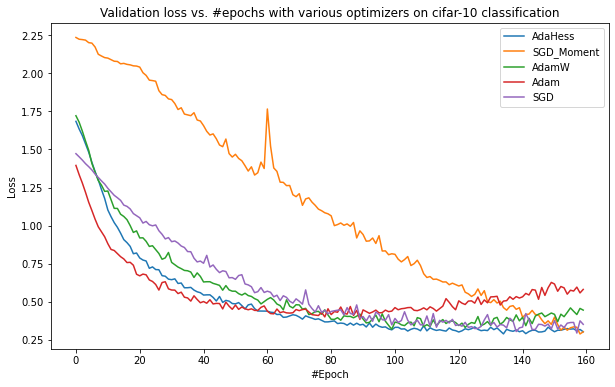

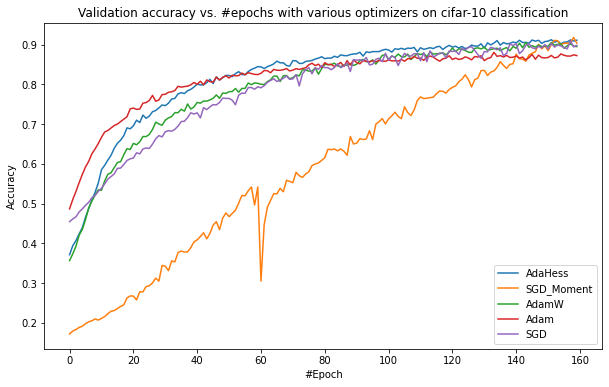

In [16]:
print("======== Classification Experiment on Cifar-10 dataset ========")
plt.figure(figsize=(10,6))
for filename in os.listdir(cv_dir):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(cv_dir, filename))
        print(filename)
        print("max accuracy", df['val_acc'].max())
        print("min loss", df['val_loss'].min())
        opt = filename.split('.')[0].rsplit('_', 3)[0]
        plt.plot(df['epoch'], df['val_loss'], label=opt)
plt.xlabel("#Epoch")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.title("Validation loss vs. #epochs with various optimizers on cifar-10 classification".format(opt))
plt.show()


plt.figure(figsize=(10,6))
for filename in os.listdir(cv_dir):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(cv_dir, filename))
#         print(filename)
        opt = filename.split('.')[0].rsplit('_', 3)[0]
        plt.plot(df['epoch'], df['val_acc'], label=opt)
plt.xlabel("#Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Validation accuracy vs. #epochs with various optimizers on cifar-10 classification".format(opt))
plt.show()

======== cv_new ========
['1.1811', '0.0390', '0.0043', '0.0044', '0.0010']


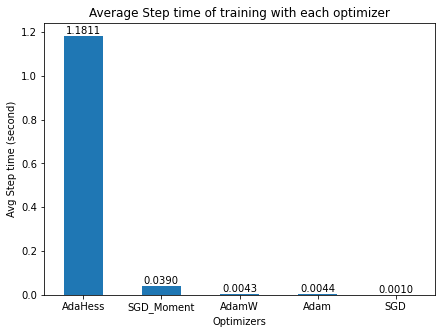

In [17]:
print("======== cv_new ========")
step_times = {}
for filename in os.listdir(cv_dir):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(cv_dir, filename))
        opt = filename.split('.')[0].rsplit('_', 3)[0]
        t = np.average(df['opt_time'])
        step_times[opt] = t
        

opts = list(step_times.keys())
step_time_values = list(step_times.values())
step_time_series = pd.Series(step_time_values)

# Plot the figure.
plt.figure(figsize=(7, 5))
plt.title("Average Step time of training with each optimizer")
ax = step_time_series.plot(kind='bar')
# ax.set_title('')
ax.set_xlabel('Optimizers')
ax.set_ylabel('Avg Step time (second)')
ax.set_xticklabels(opts, rotation='horizontal')

rects = ax.patches

# Make some labels.
labels = ["%2.4f" % step_time_values[i] for i in range(len(step_time_values))]
print(labels)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')

### Regression Task

======== Regression Experiment on Eggholder function ========
AdamW_Reg_torch.csv


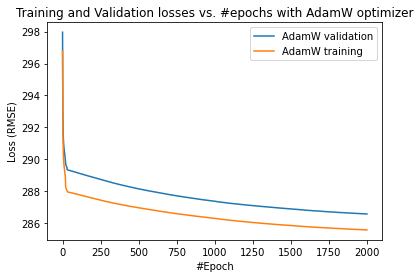

AdaHess_Reg_torch.csv


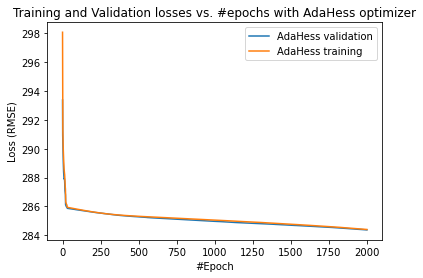

Adam_Reg_torch.csv


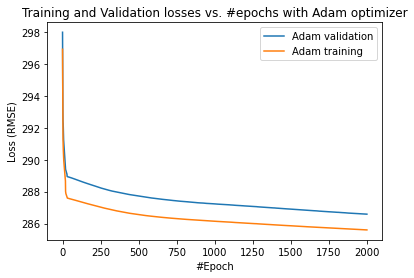

SGD_Reg_torch.csv


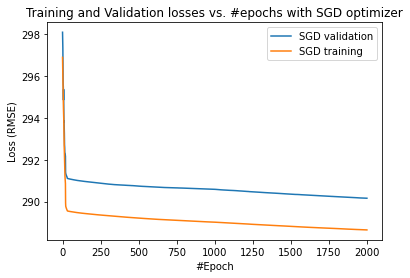

SGD_Moment_Reg_torch.csv


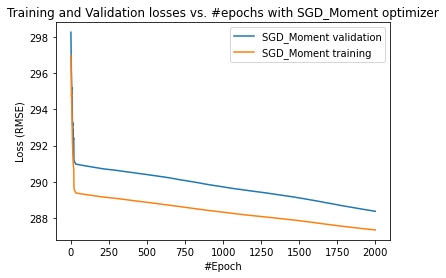

In [18]:
print("======== Regression Experiment on Eggholder function ========")
for filename in os.listdir(eggholder_dir):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(eggholder_dir, filename))
        print(filename)
        opt = filename.split('.')[0].rsplit('_', 2)[0]
        plt.figure()
        plt.plot(df['epoch'], df['val_loss'].apply(lambda x: np.sqrt(x)), label=opt + " validation")
        plt.plot(df['epoch'], df['loss'].apply(lambda x: np.sqrt(x)), label=opt + " training")
        # plt.plot(df2['epoch'], df2['val_loss'], label="SGD_Reg")
        plt.xlabel("#Epoch")
        plt.ylabel("Loss (RMSE)")
        plt.legend(loc="best")
        plt.title("Training and Validation losses vs. #epochs with {} optimizer".format(opt))
        plt.show()


======== Regression Experiment on Eggholder Function ========
AdamW_Reg_torch.csv
286.57694211153836
AdaHess_Reg_torch.csv
284.3772802106385
Adam_Reg_torch.csv
286.58618359055623
SGD_Reg_torch.csv
290.16090094549264
SGD_Moment_Reg_torch.csv
288.3593881231371


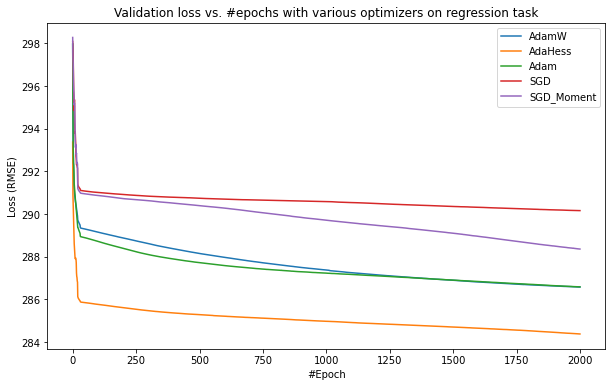

In [19]:
print("======== Regression Experiment on Eggholder Function ========")
plt.figure(figsize=(10,6))
for filename in os.listdir(eggholder_dir):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(eggholder_dir, filename))
        print(filename)
        print(np.sqrt(df['val_loss'].min()))
        opt = filename.split('.')[0].rsplit('_', 2)[0]
        plt.plot(df['epoch'], df['val_loss'].apply(lambda x: np.sqrt(x)), label=opt)
plt.xlabel("#Epoch")
plt.ylabel("Loss (RMSE)")
plt.legend(loc="best")
plt.title("Validation loss vs. #epochs with various optimizers on regression task".format(opt))
plt.show()

# no accuracy

======== reg ========
AdamW_Reg_torch.csv
AdaHess_Reg_torch.csv
Adam_Reg_torch.csv
SGD_Reg_torch.csv
SGD_Moment_Reg_torch.csv
['6.1054e-04', '2.5069e-03', '6.3346e-04', '1.7474e-04', '2.8194e-04']


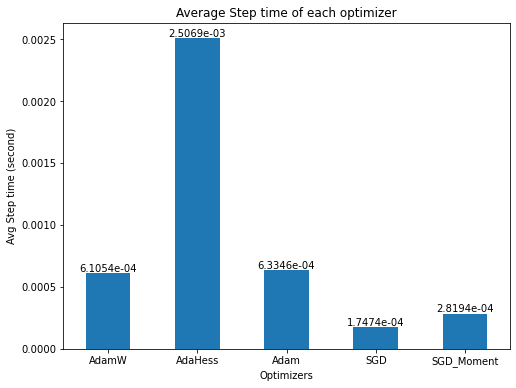

In [20]:
print("======== reg ========")
step_times = {}
for filename in os.listdir(eggholder_dir):
    if filename.endswith(".csv"):
        print(filename)
        df = pd.read_csv(os.path.join(eggholder_dir, filename))
        opt = filename.split('.')[0].rsplit('_', 2)[0]
        t = np.average(df['opt_time'])
        step_times[opt] = t
        

opts = list(step_times.keys())
step_time_values = list(step_times.values())
step_time_series = pd.Series(step_time_values)

# Plot the figure.
plt.figure(figsize=(8, 6))
plt.title("Average Step time of each optimizer")
ax = step_time_series.plot(kind='bar')
# ax.set_title('')
ax.set_xlabel('Optimizers')
ax.set_ylabel('Avg Step time (second)')
ax.set_xticklabels(opts, rotation='horizontal')

rects = ax.patches

# Make some labels.
labels = ["%2.4e" % step_time_values[i] for i in range(len(step_time_values))]
print(labels)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')